Постройте топ фильмов в категориях Action и Comedy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook # классная вещь - прогресс бар

In [2]:
from IPython.display import Image

In [49]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

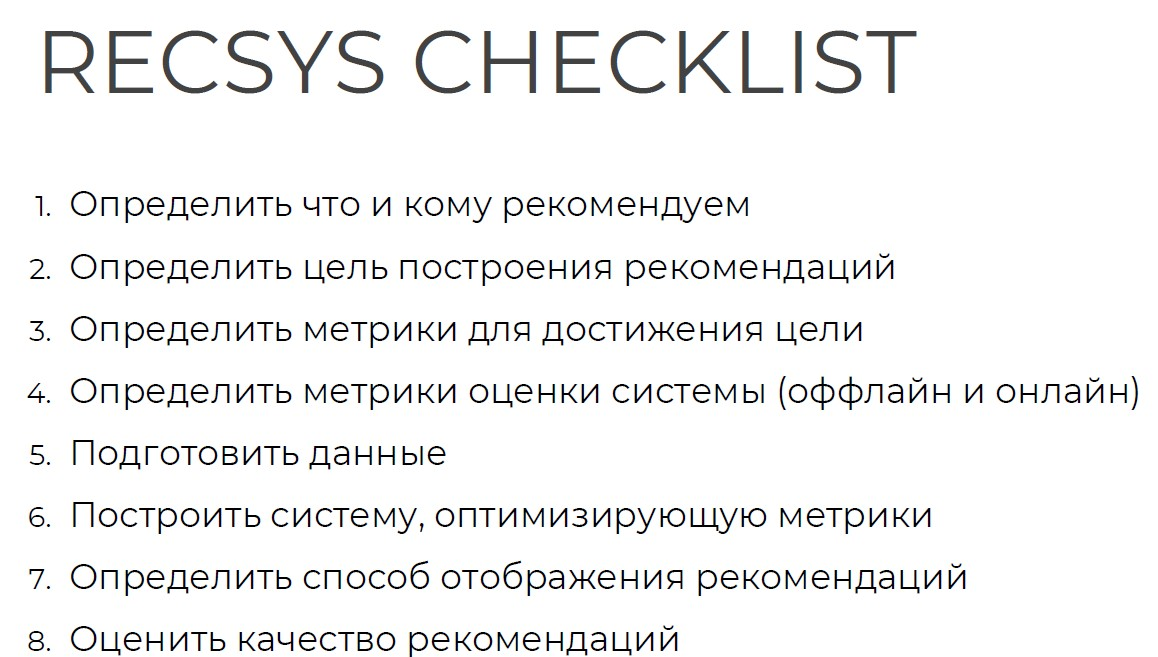

In [4]:
Image("Screenshot_4.jpg", width=500, height=300)

In [5]:
tables_dict = {'links':links, 'movies':movies, 'ratings':ratings, 'tags':tags}

In [6]:
for key, value in tables_dict.items():
    all_rows = value.shape[0]
    no_nan_rows = value.dropna(inplace=False).shape[0]
    print('Датасет {}'.format(key))
    print('Всего строк: {}, из них {} с отсутствующими значениями'.format(all_rows, all_rows - no_nan_rows))
    if all_rows - no_nan_rows > 0:
        print("Применить dropna?")
    print('-'*50)

Датасет links
Всего строк: 9742, из них 8 с отсутствующими значениями
Применить dropna?
--------------------------------------------------
Датасет movies
Всего строк: 9742, из них 0 с отсутствующими значениями
--------------------------------------------------
Датасет ratings
Всего строк: 100836, из них 0 с отсутствующими значениями
--------------------------------------------------
Датасет tags
Всего строк: 3683, из них 0 с отсутствующими значениями
--------------------------------------------------


In [7]:
links = links.dropna(inplace=True)

In [8]:
for key, value in tables_dict.items():
    print('*' * 20, key, '*' * 20)
    print(value.head(3), '\n')

******************** links ********************
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0 

******************** movies ********************
   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance   

******************** ratings ********************
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224 

******************** tags ********************
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  14

In [9]:
# найдем фильмы, которые имеют жанры Action и Comedy
act_com_movies = movies[movies['genres'].str.contains(r'Comedy', r'Action')]
act_com_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
11,12,Dracula: Dead and Loving It (1995),Comedy|Horror
17,18,Four Rooms (1995),Comedy
18,19,Ace Ventura: When Nature Calls (1995),Comedy
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller


In [10]:
print('Из {} фильмов {} относятся к жанру Comedy и (или) Action'.format(movies.shape[0], act_com_movies.shape[0]))

Из 9742 фильмов 3756 относятся к жанру Comedy и (или) Action


In [11]:
# фильмы не повторяются, проверим
act_com_movies['movieId'].shape[0] == len(act_com_movies['movieId'].unique())

True

In [12]:
# Чтобы построить топ фильмов, логично использовать средние рейтинги и кол-во просмотров. В наших данных - это не одно и то же

In [13]:
# но для начала выведем читабельный год проставления оценки
from datetime import datetime
def to_year(x):
    
    x = datetime.utcfromtimestamp(x).strftime('%Y')
    return int(x)

In [14]:
# проверим
to_year(1445714994)

2015

In [50]:
# преобразуем timestamp в года
ratings['timestamp'] = ratings['timestamp'].apply(to_year)

In [51]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000
1,1,3,4.0,2000
2,1,6,4.0,2000
3,1,47,5.0,2000
4,1,50,5.0,2000


In [24]:
# смотрим на кол-во рейтингов
views = ratings[['movieId', 'rating']].groupby('movieId').count()#.sort_values(['rating'], ascending=[False])
views.head()

,rating
movieId,
1,215
2,110
3,52
4,7
5,49


In [25]:
ratings[['movieId', 'rating']].groupby('movieId').count().sort_values(['rating'], ascending=[False]).head(1)


,rating
movieId,
356,329


In [26]:
# мини проверка, действительно ли максимальное количество оценок 329
ratings[['movieId', 'rating']].groupby('movieId').count().max()

rating    329
dtype: int64

In [27]:
# найдем средние оценки для всех фильмов
average_rate = ratings[['movieId', 'rating']].groupby('movieId').mean()#.sort_values(['rating'], ascending=False)
average_rate.head()

,rating
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [28]:
# найдем медианные оценки для всех фильмов
median_rate = ratings[['movieId', 'rating']].groupby('movieId').median()#.sort_values(['rating'], ascending=False)
median_rate.head()

,rating
movieId,
1,4.0
2,3.5
3,3.0
4,3.0
5,3.0


In [29]:
# найдем медианные значения года проставления оценки (просмотра) для всех фильмов
median_year = ratings[['movieId', 'timestamp']].groupby('movieId').median()#.sort_values(['timestamp'], ascending=False)
median_year.head()

,timestamp
movieId,
1,2005.0
2,2005.0
3,2000.0
4,1996.0
5,1997.0


In [30]:
# соединим левым джоином таблицы, чтобы получить таблицу с кол-вом просмотров только тех фильмов
# которые нам интересны (Comedy, Action)
data = act_com_movies.join(views, on='movieId', how='left')
data.columns = ['movieId', 'title', 'genres', 'views']
data.head()

,movieId,title,genres,views
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
4,5,Father of the Bride Part II (1995),Comedy,49.0
6,7,Sabrina (1995),Comedy|Romance,54.0


In [31]:
# теперь добавим данные о средней оценке
data = data.join(average_rate, on='movieId', how='left')
data.columns = ['movieId', 'title', 'genres', 'views', 'aver_rating']
data.head()

,movieId,title,genres,views,aver_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429
6,7,Sabrina (1995),Comedy|Romance,54.0,3.185185


In [32]:
# теперь добавим данные о медианной оценке
data = data.join(median_rate, on='movieId', how='left')
data.columns = ['movieId', 'title', 'genres', 'views', 'aver_rating', 'median_rating']
data.head()

,movieId,title,genres,views,aver_rating,median_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,4.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,3.0
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,3.0
6,7,Sabrina (1995),Comedy|Romance,54.0,3.185185,3.0


In [33]:
# теперь добавим данные о медианном значении года оценок
data = data.join(median_year, on='movieId', how='left')
data.columns = ['movieId', 'title', 'genres', 'views', 'aver_rating', 'median_rating', 'timestamp']
data.head()

,movieId,title,genres,views,aver_rating,median_rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,4.0,2005.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,3.0,2000.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,3.0,1996.0
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,3.0,1997.0
6,7,Sabrina (1995),Comedy|Romance,54.0,3.185185,3.0,1997.0


In [34]:
# проверим, не потерялись ли данные
data.shape[0] == act_com_movies.shape[0]

True

In [35]:
# теперь тупо сортируем вначале по кол-ву просмотров
data.sort_values(['views'], ascending=[False]).head()

,movieId,title,genres,views,aver_rating,median_rating,timestamp
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134,4.0,2007.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068,4.5,2006.0
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,4.0,2005.0
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,183.0,3.792350,4.0,2001.0
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller,181.0,4.116022,4.0,2005.0


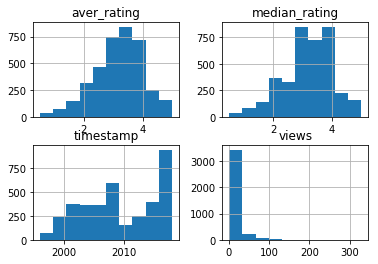

In [37]:
data[['aver_rating', 'median_rating', 'views', 'timestamp']].sort_values(['views'], ascending=[False]).hist();

In [38]:
# для рекомендаций нужно придумать алгоритм, учитывающий не только оценку, 
# но и ее значимость (которая зависит от кол-ва просмотров)

In [39]:
# посчитаем среднее кол-во оценок по всем фильмам
mean_averages = data.views.mean()
mean_averages

10.405808686384226

In [40]:
# посчитаем максималное кол-во оценок
max_marks = data.views.max()
max_marks

329.0

In [41]:
# посчитаем минимальное кол-во оценок
min_marks = data.views.min()
min_marks

1.0

Придумаем метрику:
    
    
$${\displaystyle Q={\frac {N_{i} - N_{ср}}{R_{макс}-R_{мин}}}.}$$ 

где ${\displaystyle N_{i}}$ - количество оценок фильма, 

${\displaystyle N_{ср}}$ - среднее количество оценок для всех фильмов,  

${\displaystyle R_{макс}}$ - максимальное кол-во оценок среди всех фильмов, 

${\displaystyle R_{мин}}$ - минимальное кол-во оценок среди всех фильмов 


In [42]:
# применим метрику. 
data['recomendation'] = (data['views'] - mean_averages) / (max_marks - min_marks)
data.head()

,movieId,title,genres,views,aver_rating,median_rating,timestamp,recomendation
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,4.0,2005.0,0.623763
2,3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615,3.0,2000.0,0.126812
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143,3.0,1996.0,-0.010384
4,5,Father of the Bride Part II (1995),Comedy,49.0,3.071429,3.0,1997.0,0.117665
6,7,Sabrina (1995),Comedy|Romance,54.0,3.185185,3.0,1997.0,0.132909


In [43]:
# вполне себе неплохой рейтинг, где фильм с более высокой средней оценкой, но меньшим кол-вом просмотров - ниже, чем
# фильм с меньшей средней оценкой, но бОльшим кол-вом просмотров 
data.sort_values(['recomendation'], ascending=[False]).head(10)

,movieId,title,genres,views,aver_rating,median_rating,timestamp,recomendation
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134,4.0,2007.0,0.971324
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068,4.5,2006.0,0.904251
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930,4.0,2005.0,0.623763
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical,183.0,3.792350,4.0,2001.0,0.526202
520,608,Fargo (1996),Comedy|Crime|Drama|Thriller,181.0,4.116022,4.0,2005.0,0.520104
337,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,178.0,3.497191,3.5,1999.0,0.510958
969,1270,Back to the Future (1985),Adventure|Comedy|Sci-Fi,171.0,4.038012,4.0,2007.0,0.489616
3194,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,170.0,3.867647,4.0,2010.0,0.486568
1183,1580,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi,165.0,3.487879,3.5,2006.0,0.471324
302,344,Ace Ventura: Pet Detective (1994),Comedy,161.0,3.040373,3.0,2001.0,0.459129


In [44]:
# Метрика для некоторых фильмов даже отрицательная. Откуда взялись NaN, не совсем понятно... Видимо при объединении таблиц
data.sort_values(['recomendation'], ascending=[False]).tail(5)

,movieId,title,genres,views,aver_rating,median_rating,timestamp,recomendation
5920,33826,Saint Ralph (2004),Comedy|Drama,1.0,2.5,2.5,2006.0,-0.028676
9741,193609,Andrew Dice Clay: Dice Rules (1991),Comedy,1.0,4.0,4.0,2018.0,-0.028676
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN,NaN,NaN,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN,NaN,NaN,NaN
7565,85565,Chalet Girl (2011),Comedy|Romance,NaN,NaN,NaN,NaN,NaN


In [60]:
data.dropna(inplace=True)

In [61]:
# "усовершенствуем" рекомендации, исходя из наивной гипотезы, что если в основном рейтинги ставились давно, то такие рекомендации
# менее ценные
# придумаем простую градацию
def old_fashion(year):
    year = int(year)
    if year < 2000:
        return 0.7
    elif year < 2010:
        return 0.8
    elif year < 2015:
        return 0.9
    else:
        return 1

In [62]:
# недостаток в том, что отрицательные оценки рекомендаций будут при умножении на коэффициент улучшаться, что политически неверно
data['recomendation_with_year'] = data['timestamp'].apply(old_fashion) * data['recomendation']

In [69]:
# при таком подходе Шрек взлетел с 8-го на 4-ое место!
data[['title', 'views', 'aver_rating', 'median_rating', 'timestamp', 'recomendation', 'recomendation_with_year']]\
.sort_values(['recomendation_with_year'], ascending=[False]).head(10)

,title,views,aver_rating,median_rating,timestamp,recomendation,recomendation_with_year
314,Forrest Gump (1994),329.0,4.164134,4.0,2007.0,0.971324,0.777059
257,Pulp Fiction (1994),307.0,4.197068,4.5,2006.0,0.904251,0.723400
0,Toy Story (1995),215.0,3.920930,4.0,2005.0,0.623763,0.499010
3194,Shrek (2001),170.0,3.867647,4.0,2010.0,0.486568,0.437911
506,Aladdin (1992),183.0,3.792350,4.0,2001.0,0.526202,0.420961
520,Fargo (1996),181.0,4.116022,4.0,2005.0,0.520104,0.416083
969,Back to the Future (1985),171.0,4.038012,4.0,2007.0,0.489616,0.391693
4427,Pirates of the Caribbean: The Curse of the Bla...,149.0,3.778523,4.0,2012.0,0.422543,0.380289
1183,Men in Black (a.k.a. MIB) (1997),165.0,3.487879,3.5,2006.0,0.471324,0.377059
302,Ace Ventura: Pet Detective (1994),161.0,3.040373,3.0,2001.0,0.459129,0.367303


In [71]:
# Такой рейтинг уже не стыдно предоставить реальным пользователям

In [70]:
# ну и посмотрим напоследок на аутсайдеров. Немного жалко фильм Мимино...
data[['title', 'views', 'aver_rating', 'median_rating', 'timestamp', 'recomendation', 'recomendation_with_year']]\
.sort_values(['recomendation_with_year'], ascending=[False]).tail(10)

,title,views,aver_rating,median_rating,timestamp,recomendation,recomendation_with_year
8092,Jim Jefferies: Fully Functional (EPIX) (2012),1.0,4.5,4.5,2018.0,-0.028676,-0.028676
3384,Her Alibi (1989),1.0,2.5,2.5,2017.0,-0.028676,-0.028676
8113,Oh Boy (A Coffee in Berlin) (2012),1.0,3.5,3.5,2018.0,-0.028676,-0.028676
8118,"Unintentional Kidnapping of Mrs. Elfriede Ott,...",1.0,2.5,2.5,2017.0,-0.028676,-0.028676
8119,"Legend of Sleepy Hollow, The (1949)",1.0,2.0,2.0,2018.0,-0.028676,-0.028676
8128,Mezzo Forte (1998),1.0,3.0,3.0,2018.0,-0.028676,-0.028676
8147,Grabbers (2012),1.0,3.0,3.0,2017.0,-0.028676,-0.028676
8154,Bill Hicks: Revelations (1993),1.0,5.0,5.0,2015.0,-0.028676,-0.028676
8162,Mimino (1977),1.0,4.0,4.0,2015.0,-0.028676,-0.028676
9741,Andrew Dice Clay: Dice Rules (1991),1.0,4.0,4.0,2018.0,-0.028676,-0.028676
